In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/learning_ai'
sys.path.append(ROOT_PATH)

Mounted at /content/drive


In [2]:
import sys
ROOT_PATH='.'
sys.path.append(ROOT_PATH)
sys.path.append('/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages')

Convolution (64, 28, 28)
BatchNormalization (64, 28, 28)
Sigmoid (64, 28, 28)
Convolution (64, 28, 28)
BatchNormalization (64, 28, 28)
Sigmoid (64, 28, 28)
Pooling (64, 14, 14)
Convolution (128, 14, 14)
BatchNormalization (128, 14, 14)
Sigmoid (128, 14, 14)
Convolution (128, 14, 14)
BatchNormalization (128, 14, 14)
Sigmoid (128, 14, 14)
Pooling (128, 7, 7)
Convolution (256, 7, 7)
BatchNormalization (256, 7, 7)
Sigmoid (256, 7, 7)
Convolution (256, 7, 7)
BatchNormalization (256, 7, 7)
Sigmoid (256, 7, 7)
GAP (256,)
Affine (2,)
BatchNormalization (2,)
Sigmoid (2,)
Affine (256,)
Sigmoid (256,)
Repeat (256, 7, 7)
Convolution (256, 7, 7)
BatchNormalization (256, 7, 7)
Sigmoid (256, 7, 7)
Convolution (256, 7, 7)
BatchNormalization (256, 7, 7)
Sigmoid (256, 7, 7)
Deconvolution (64, 14, 14)
Sigmoid (64, 14, 14)
Convolution (128, 14, 14)
BatchNormalization (128, 14, 14)
Sigmoid (128, 14, 14)
Convolution (128, 14, 14)
BatchNormalization (128, 14, 14)
Sigmoid (128, 14, 14)
Deconvolution (64, 28, 

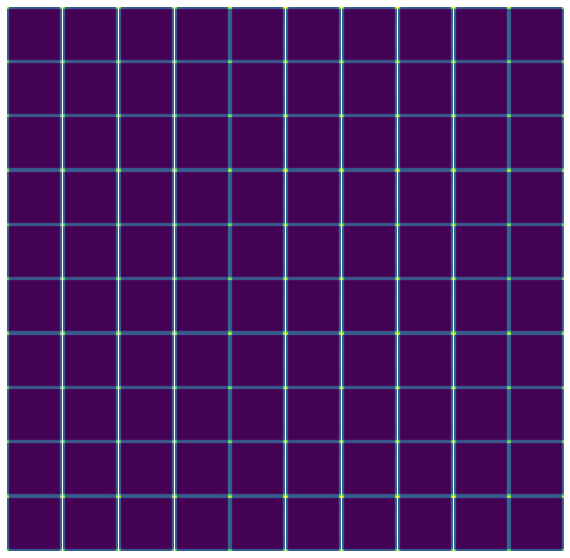

| epoch 2 |  iter 1 / 1875 | time 1419[s] | loss 0.00


KeyboardInterrupt: 

In [9]:
from common import config
config.GPU=True
from common.np import *
from model.auto_encoder import AutoEncoder
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu


data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('f')[:100]
x_test=x_test.transpose(0,3,1,2).astype('f')[:100]
t_train=t_train.reshape(t_train.shape[0])[:100]
t_test=t_test.reshape(t_test.shape[0])[:100]

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

enc_layer_list=[['conv',[64,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],
                ['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
                ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],
                ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
                ['conv',[256,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],
                ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
                ['gap',[]],['affine',[2,1]],['batchnorm',[0.9,None,None]],['sigmoid',[]]]

dec_layer_list=[['affine',[256,2]],['relu',[]],['repeat',[7,7]],
                ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
                ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
                ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
                ['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['conv',[1,3,3,1,1,2]],['relu',[]]]

loss_layer='mse'

lr=0.001
max_epoch=20
batch_size=32
eval_interval=100
eval_accuracy=False
show_generate=True
generate_params=(0,1,0.1,(3,32,32))
file_name=ROOT_PATH+'/pkl/AE_cifar10/AE_cifar10'

model=AutoEncoder(input_shape=input_shape,enc_layer_list=enc_layer_list,
                  dec_layer_list=dec_layer_list,loss_layer=loss_layer)
for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)

optimizer=Adam(lr)
trainer=Trainer(model,optimizer,file_name)

trainer.fit(x=x_train,t=x_train,x_test=x_test,t_test=t_test,
            max_epoch=max_epoch,batch_size=batch_size,
            eval_interval=eval_interval,eval_accuracy=eval_accuracy,
            show_generate=show_generate,generate_params=generate_params)

In [11]:
import matplotlib.pyplot as plt

x=np.array([[0.9,0.9]])
y=model.generate(x,(1,28,28))
plt.imshow(y)

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

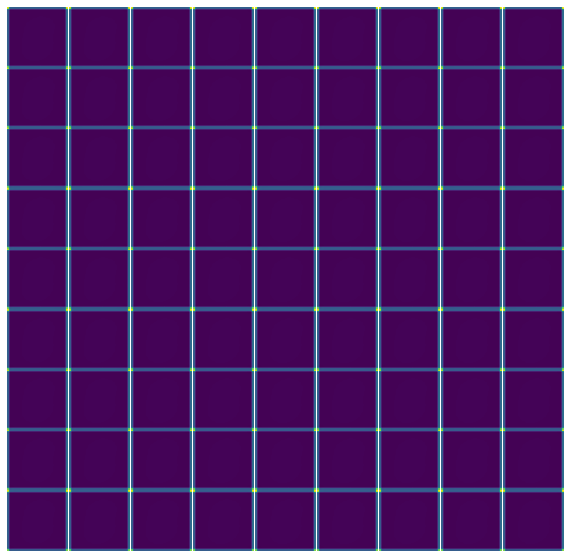

In [12]:
model.show_generate(0.1,1.0,0.1,(1,28,28))

In [2]:
from common import config
# config.GPU=True
from common.np import *
from model.auto_encoder import AutoEncoder
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu

data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('f')
x_test=x_test.transpose(0,3,1,2).astype('f')
t_train=t_train.reshape(t_train.shape[0])
t_test=t_test.reshape(t_test.shape[0])

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

enc_layer_list=[['conv',[64,3,3,1,1,2]],['relu',[]],['conv',[64,3,3,1,1,2]],['relu',[]],['pool',[2,2,0,2]],
                ['conv',[128,3,3,1,1,2]],['relu',[]],['conv',[128,3,3,1,1,2]],['relu',[]],['pool',[2,2,0,2]],
                ['conv',[256,3,3,1,1,2]],['relu',[]],['conv',[256,3,3,1,1,2]],['relu',[]],
                ['gap',[]],['affine',[2,1]],['sigmoid',[]]]

dec_layer_list=[['affine',[256,2]],['relu',[]],['repeat',[8,8]],
                ['conv',[256,3,3,1,1,2]],['relu',[]],['conv',[256,3,3,1,1,2]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[128,3,3,1,1,2]],['relu',[]],['conv',[128,3,3,1,1,2]],['relu',[]],['deconv',[64,2,2,1,1,2],],['relu',[]],
                ['conv',[64,3,3,1,1,2]],['relu',[]],['conv',[64,3,3,1,1,2]],['relu',[]],['conv',[3,3,3,1,1,2]],['relu',[]]]

loss_layer='mse'

lr=0.001

max_epoch=20
batch_size=100
eval_interval=500
eval_accuracy=False
file_name=ROOT_PATH+'/pkl/AE_cifar10'

model=AutoEncoder(input_shape=input_shape,enc_layer_list=enc_layer_list,
                  dec_layer_list=dec_layer_list,loss_layer=loss_layer)
for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)

optimizer=Adam(lr)
trainer=Trainer(model,optimizer,file_name)

trainer.fit(x=x_train,t=x_train,max_epoch=max_epoch,batch_size=batch_size,
            eval_interval=eval_interval,eval_accuracy=eval_accuracy,
            x_test=x_test,t_test=t_test)

Using TensorFlow backend.
Convolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
Relu (64, 32, 32)
Pooling (64, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Pooling (128, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
GAP (256,)
Affine (2,)
Sigmoid (2,)
Affine (256,)
Relu (256,)
Repeat (256, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
Relu (256, 8, 8)
Deconvolution (64, 16, 16)
Relu (64, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
Relu (128, 16, 16)
Deconvolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
Relu (64, 32, 32)
Convolution (3, 32, 32)
Relu (3, 32, 32)
| epoch 1 |  iter 1 / 500 | time 28[s] | loss 451.75


KeyboardInterrupt: 

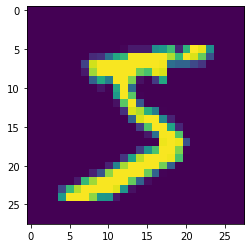

In [15]:
import matplotlib.pyplot as plt
from common.util import to_cpu
x=to_cpu(x_train[0]).transpose(1,2,0)
plt.imshow(x)